In [1]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from ssi import SSI

In [2]:
def data_mask(data, x0, y0, x1, y1):
    """Mask data on a boundry box.
    
    Parameters
    ----------
    data: np.array
        Input data to mask
    x0: int
        Top left corner x-coordinate.
    y0: int
        Top left corner y-coordinate.
    x1: int
        Bottom right corner x-coordinate.
    y1: int
        Bottom right corner y-coordinate.
        
    Note
    ----
    Data start at (1, 1) and ends at (NL, NS).
    
    """
    mask = np.ones(np.shape(data))
    xl, xr = int(min(x0, x1) - 1), int(max(x0, x1))
    yt, yb = int(min(y0, y1) - 1), int(max(y0, y1))
    mask[yt:yb, xl:xr] = 0
    return mask.astype(bool) | np.isnan(data)

In [3]:
#img = SSI('5126r_cal.pho.cub')
img = SSI('C0360063913R_cal.pho.cub')

In [4]:
img.header

PVLObject([
  ('Core',
   {'Dimensions': {'Bands': 6,
                   'Lines': 800,
                   'Samples': 800},
    'Format': 'Tile',
    'Pixels': {'Base': 0.0,
               'ByteOrder': 'Lsb',
               'Multiplier': 1.0,
               'Type': 'Real'},
    'StartByte': 65537,
    'TileLines': 400,
    'TileSamples': 400})
  ('Instrument',
   {'BlemishProtectionFlag': 'OFF',
    'ExposureDuration': Units(value=0.2625, units='seconds'),
    'ExposureType': 'NORMAL',
    'FrameDuration': Units(value=8.667, units='seconds'),
    'FrameModeId': 'FULL',
    'GainModeId': 100000,
    'InstrumentId': 'SOLID STATE IMAGING SYSTEM',
    'InvertedClockStateFlag': 'NOT INVERTED',
    'LightFloodStateFlag': 'ON',
    'ReadoutMode': 'Contiguous',
    'SpacecraftClockStartCount': 3600639.13,
    'SpacecraftName': 'Galileo Orbiter',
    'StartTime': datetime.datetime(1996, 9, 7, 14, 43, 14, 690000),
    'Summing': 1,
    'TargetName': 'EUROPA',
    'TelemetryFormat': 'IM8'})
  ('Ar

In [5]:
#img.data[0,0]

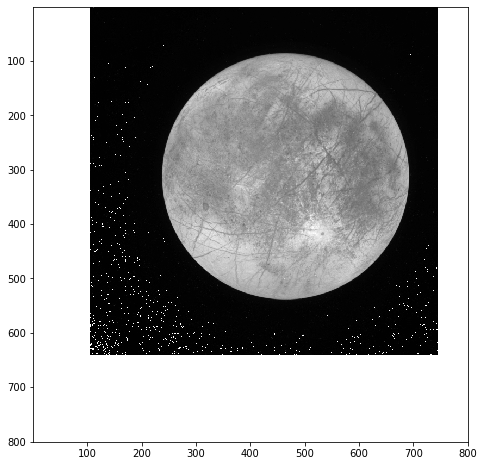

In [6]:
plt.figure(figsize=(8, 8))

plt.imshow(img.data, cmap='gray', extent=img.extent)

In [7]:
mask = data_mask(img.eme, 100, 200, 200, 200) # x0, y0, x1, y1

i_f = img.eme
#i_f = img.data[~mask] #gets the I/F of only masked pixels
#mu0 = np.cos(np.radians(img.inc[~mask])) #cosine(incidence)
#mu1 = np.cos(np.radians(img.eme[~mask])) #cosine(emission)

mu0 = np.cos(np.radians(img.inc)) #cosine(incidence)
mu1 = np.cos(np.radians(img.eme)) #cosine(emission)

In [8]:
#cond = ~np.isnan(img.eme) & ~np.isinf(img.eme)
#img.eme[cond]
img.eme

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [9]:
cond = ~np.isnan(img.eme) & ~np.isinf(img.eme) #~ not NaN or inf
xdata = [mu0[cond], mu1[cond]]
ydata = i_f[cond] 

#xdata = [mu0, mu1]
#ydata = i_f 

def func(x, k, B0):
    """Fitting function"""
    return B0 * np.power(x[0], k) * np.power(x[1], k-1)

    f(xdata, 0.7, 1) - i_f

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


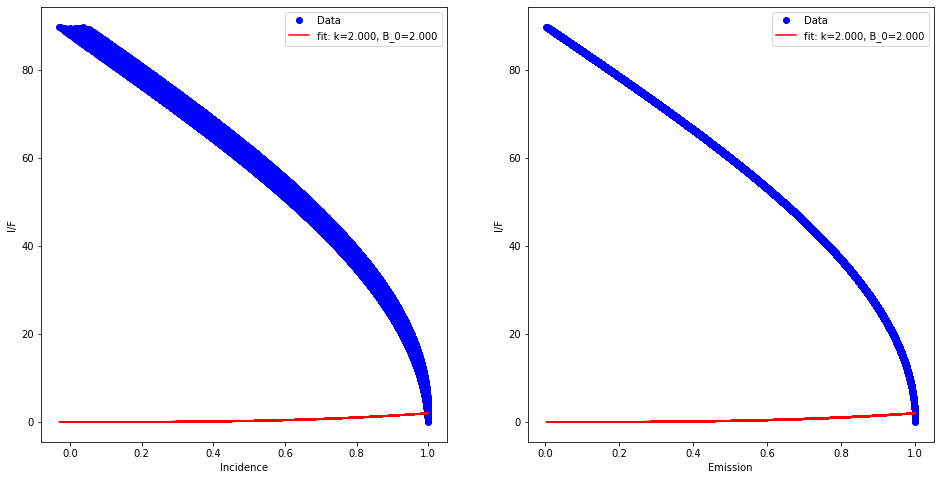

In [10]:
#popt, pcov = curve_fit(func, xdata, ydata, maxfev=5000)
popt, pcov = curve_fit(func, xdata, ydata, bounds=(1,3))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

xlabel = ['Incidence', 'Emission']

for i in range(2):
    ax[i].plot(xdata[i], ydata, 'bo', label='Data')
    ax[i].plot(xdata[i], func(xdata, *popt), 'r-', label='fit: k=%5.3f, B_0=%5.3f' % tuple(popt))

    ax[i].legend()

    ax[i].set_xlabel(xlabel[i])
    ax[i].set_ylabel('I/F');

In [ ]:
def mu0(phase, lat, long):
    return cos(lat)#*cos(phase-(long))

In [ ]:
def mu(lat, long):
    return cos(long)#*cos(lat))

In [ ]:
def MinnFunc(sub_data, pi, albedo, mu0, mu):
    return (pi*albedo*((mu0)**(k))*((mu)**(k-1)))